In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

from utils.dataloader import DataLoader

import warnings

warnings.filterwarnings("ignore")
FOLDER_PATH = 'C:\\Users\\gogan\\source\\repos\\pet-project\\pet-project\\data'

In [2]:
all_data = pd.read_csv('drug200.csv')

In [3]:
loader = DataLoader()

loader.fit(all_data)
X_all, Y_all = loader.load_data()

In [4]:
classifiers = {
    "KNN, n = 2": KNeighborsClassifier(2),
    "KNN, n = 3": KNeighborsClassifier(3),
    "KNN, n = 4": KNeighborsClassifier(4),
    "KNN, n = 5": KNeighborsClassifier(5),
    "KNN, n = 6": KNeighborsClassifier(6),
    "KNN, n = 7": KNeighborsClassifier(7),
    "KNN, n = 8": KNeighborsClassifier(8),
    "SVC, kernel = linear, C = 2": SVC(probability=True, kernel='linear', C=2),
    "SVC, kernel = poly, C = 2": SVC(probability=True, kernel='poly', C=2),
    "SVC, kernel = rbf, C = 2": SVC(probability=True, kernel='rbf', C=2),
    "SVC, kernel = sigmoid, C = 2": SVC(probability=True, kernel='sigmoid', C=2),
    "SVC, kernel = linear, C = 1": SVC(probability=True, kernel='linear', C=1),
    "SVC, kernel = poly, C = 1": SVC(probability=True, kernel='poly', C=1),
    "SVC, kernel = rbf, C = 1": SVC(probability=True, kernel='rbf', C=1),
    "SVC, kernel = sigmoid, C = 1": SVC(probability=True, kernel='sigmoid', C=1),
    "SVC, kernel = linear, C = 0.5": SVC(probability=True, kernel='linear', C=0.5),
    "SVC, kernel = poly, C = 0.5": SVC(probability=True, kernel='poly', C=0.5),
    "SVC, kernel = rbf, C = 0.5": SVC(probability=True, kernel='rbf', C=0.5),
    "SVC, kernel = sigmoid, C = 0.5": SVC(probability=True, kernel='sigmoid', C=0.5),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest, n_estimators = 10": RandomForestClassifier(n_estimators=10),
    "Random Forest, n_estimators = 30": RandomForestClassifier(n_estimators=30),
    "Random Forest, n_estimators = 50": RandomForestClassifier(n_estimators=50),
    "Random Forest, n_estimators = 80": RandomForestClassifier(n_estimators=80),
    "Random Forest, n_estimators = 100": RandomForestClassifier(n_estimators=100),
    "Random Forest, n_estimators = 150": RandomForestClassifier(n_estimators=150),
    "Ada Boost, n_estimators = 10, learning_rate = 1": AdaBoostClassifier(n_estimators=10, learning_rate=1),
    "Ada Boost, n_estimators = 20, learning_rate = 1": AdaBoostClassifier(n_estimators=10, learning_rate=1),
    "Ada Boost, n_estimators = 30, learning_rate = 1": AdaBoostClassifier(n_estimators=10, learning_rate=1),
    "Ada Boost, n_estimators = 40, learning_rate = 1": AdaBoostClassifier(n_estimators=10, learning_rate=1),
    "Ada Boost, n_estimators = 50, learning_rate = 1": AdaBoostClassifier(n_estimators=10, learning_rate=1),
    "Ada Boost, n_estimators = 60, learning_rate = 1": AdaBoostClassifier(n_estimators=10, learning_rate=1),
    "Ada Boost, n_estimators = 70, learning_rate = 1": AdaBoostClassifier(n_estimators=10, learning_rate=1),
    "Ada Boost, n_estimators = 80, learning_rate = 1": AdaBoostClassifier(n_estimators=10, learning_rate=1),
    "Ada Boost, n_estimators = 10, learning_rate = 0.5": AdaBoostClassifier(n_estimators=10, learning_rate=0.5),
    "Ada Boost, n_estimators = 20, learning_rate = 0.5": AdaBoostClassifier(n_estimators=10, learning_rate=0.5),
    "Ada Boost, n_estimators = 30, learning_rate = 0.5": AdaBoostClassifier(n_estimators=10, learning_rate=0.5),
    "Ada Boost, n_estimators = 40, learning_rate = 0.5": AdaBoostClassifier(n_estimators=10, learning_rate=0.5),
    "Ada Boost, n_estimators = 50, learning_rate = 0.5": AdaBoostClassifier(n_estimators=10, learning_rate=0.5),
    "Ada Boost, n_estimators = 60, learning_rate = 0.5": AdaBoostClassifier(n_estimators=10, learning_rate=0.5),
    "Ada Boost, n_estimators = 70, learning_rate = 0.5": AdaBoostClassifier(n_estimators=10, learning_rate=0.5),
    "Ada Boost, n_estimators = 80, learning_rate = 0.5": AdaBoostClassifier(n_estimators=10, learning_rate=0.5),
    "Ada Boost, n_estimators = 10, learning_rate = 2": AdaBoostClassifier(n_estimators=10, learning_rate=2),
    "Ada Boost, n_estimators = 20, learning_rate = 2": AdaBoostClassifier(n_estimators=10, learning_rate=2),
    "Ada Boost, n_estimators = 30, learning_rate = 2": AdaBoostClassifier(n_estimators=10, learning_rate=2),
    "Ada Boost, n_estimators = 40, learning_rate = 2": AdaBoostClassifier(n_estimators=10, learning_rate=2),
    "Ada Boost, n_estimators = 50, learning_rate = 2": AdaBoostClassifier(n_estimators=10, learning_rate=2),
    "Ada Boost, n_estimators = 60, learning_rate = 2": AdaBoostClassifier(n_estimators=10, learning_rate=2),
    "Ada Boost, n_estimators = 70, learning_rate = 2": AdaBoostClassifier(n_estimators=10, learning_rate=2),
    "Ada Boost, n_estimators = 80, learning_rate = 2": AdaBoostClassifier(n_estimators=10, learning_rate=2),
    "Gradient Boost, n_estimators = 10, learning_rate = 1, loss = deviance": GradientBoostingClassifier(n_estimators=10, learning_rate=1, loss='deviance'),
    "Gradient Boost, n_estimators = 30, learning_rate = 1, loss = deviance": GradientBoostingClassifier(n_estimators=30, learning_rate=1, loss='deviance'),
    "Gradient Boost, n_estimators = 50, learning_rate = 1, loss = deviance": GradientBoostingClassifier(n_estimators=50, learning_rate=1, loss='deviance'),
    "Gradient Boost, n_estimators = 70, learning_rate = 1, loss = deviance": GradientBoostingClassifier(n_estimators=70, learning_rate=1, loss='deviance'),
    "Gradient Boost, n_estimators = 100, learning_rate = 1, loss = deviance": GradientBoostingClassifier(n_estimators=100, learning_rate=1, loss='deviance'),
    "Gradient Boost, n_estimators = 150, learning_rate = 1, loss = deviance": GradientBoostingClassifier(n_estimators=150, learning_rate=1, loss='deviance'),
    "Gradient Boost, n_estimators = 10, learning_rate = 0.5, loss = deviance": GradientBoostingClassifier(n_estimators=10, learning_rate=0.5, loss='deviance'),
    "Gradient Boost, n_estimators = 30, learning_rate = 0.5, loss = deviance": GradientBoostingClassifier(n_estimators=30, learning_rate=0.5, loss='deviance'),
    "Gradient Boost, n_estimators = 50, learning_rate = 0.5, loss = deviance": GradientBoostingClassifier(n_estimators=50, learning_rate=0.5, loss='deviance'),
    "Gradient Boost, n_estimators = 70, learning_rate = 0.5, loss = deviance": GradientBoostingClassifier(n_estimators=70, learning_rate=0.5, loss='deviance'),
    "Gradient Boost, n_estimators = 100, learning_rate = 0.5, loss = deviance": GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, loss='deviance'),
    "Gradient Boost, n_estimators = 150, learning_rate = 0.5, loss = deviance": GradientBoostingClassifier(n_estimators=150, learning_rate=0.5, loss='deviance'),
    "Gaussian Naive Bayes": GaussianNB(),
    "Linear Discriminant Analysis, solver = singular value decomposition": LinearDiscriminantAnalysis(solver='svd'),
    "Linear Discriminant Analysis, solver = least squares solution": LinearDiscriminantAnalysis(solver='lsqr'),
    "Linear Discriminant Analysis, solver = eigenvalue decomposition": LinearDiscriminantAnalysis(solver='eigen'),
    "Quadratic Discriminant Analysis, reg_param = 0": QuadraticDiscriminantAnalysis(reg_param=0),
    "Quadratic Discriminant Analysis, reg_param = 0.2": QuadraticDiscriminantAnalysis(reg_param=0.2),
    "Quadratic Discriminant Analysis, reg_param = 0.5": QuadraticDiscriminantAnalysis(reg_param=0.5),
    "Quadratic Discriminant Analysis, reg_param = 1": QuadraticDiscriminantAnalysis(reg_param=1),
    "Quadratic Discriminant Analysis, reg_param = 2": QuadraticDiscriminantAnalysis(reg_param=2),
    "Logistic Regression, regularization: none": LogisticRegression(),
    "Logistic Regression, regularization: L1, C = 2, solver = liblinear": LogisticRegression(penalty='l1', C=2, solver='liblinear', random_state=42),
    "Logistic Regression, regularization: L1, C = 1, solver = liblinear": LogisticRegression(penalty='l1', C=1, solver='liblinear', random_state=42),
    "Logistic Regression, regularization: L1, C = 0.5, solver = liblinear": LogisticRegression(penalty='l1', C=0.5, solver='liblinear', random_state=42),
    "Logistic Regression, regularization: L2, C = 2, solver = lbfgs": LogisticRegression(penalty='l2', C=2, solver='lbfgs'),
    "Logistic Regression, regularization: L2, C = 1, solver = lbfgs": LogisticRegression(penalty='l2', C=1, solver='lbfgs'),
    "Logistic Regression, regularization: L2, C = 0.5, solver = lbfgs": LogisticRegression(penalty='l2', C=0.5, solver='lbfgs'),
}

In [5]:
log_cols = ['Classifier', 'Mean accuracy']
log = pd.DataFrame(columns=log_cols)


acc_dict = {}

for name, classifier in classifiers.items():
    print('train started:', name)
    acc_dict[name] = cross_val_score(classifier, X_all, Y_all, cv=5)
    print('train complete:', name)

train started: KNN, n = 2
train complete: KNN, n = 2
train started: KNN, n = 3
train complete: KNN, n = 3
train started: KNN, n = 4
train complete: KNN, n = 4
train started: KNN, n = 5
train complete: KNN, n = 5
train started: KNN, n = 6
train complete: KNN, n = 6
train started: KNN, n = 7
train complete: KNN, n = 7
train started: KNN, n = 8
train complete: KNN, n = 8
train started: SVC, kernel = linear, C = 2
train complete: SVC, kernel = linear, C = 2
train started: SVC, kernel = poly, C = 2
train complete: SVC, kernel = poly, C = 2
train started: SVC, kernel = rbf, C = 2
train complete: SVC, kernel = rbf, C = 2
train started: SVC, kernel = sigmoid, C = 2
train complete: SVC, kernel = sigmoid, C = 2
train started: SVC, kernel = linear, C = 1
train complete: SVC, kernel = linear, C = 1
train started: SVC, kernel = poly, C = 1
train complete: SVC, kernel = poly, C = 1
train started: SVC, kernel = rbf, C = 1
train complete: SVC, kernel = rbf, C = 1
train started: SVC, kernel = sigmoid, 

train complete: Logistic Regression, regularization: none
train started: Logistic Regression, regularization: L1, C = 2, solver = liblinear
train complete: Logistic Regression, regularization: L1, C = 2, solver = liblinear
train started: Logistic Regression, regularization: L1, C = 1, solver = liblinear
train complete: Logistic Regression, regularization: L1, C = 1, solver = liblinear
train started: Logistic Regression, regularization: L1, C = 0.5, solver = liblinear
train complete: Logistic Regression, regularization: L1, C = 0.5, solver = liblinear
train started: Logistic Regression, regularization: L2, C = 2, solver = lbfgs
train complete: Logistic Regression, regularization: L2, C = 2, solver = lbfgs
train started: Logistic Regression, regularization: L2, C = 1, solver = lbfgs
train complete: Logistic Regression, regularization: L2, C = 1, solver = lbfgs
train started: Logistic Regression, regularization: L2, C = 0.5, solver = lbfgs
train complete: Logistic Regression, regularizati

In [6]:
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf].mean()
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns = log_cols)
    log = log.append(log_entry)

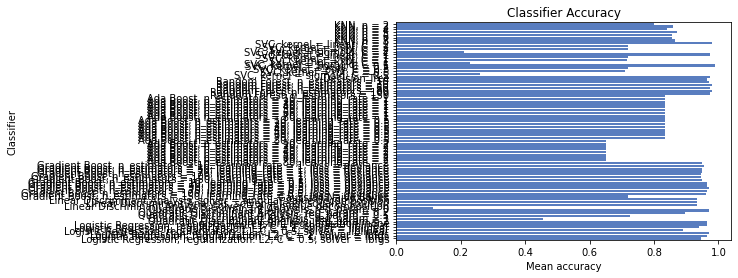

In [7]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x = 'Mean accuracy', y = 'Classifier', data = log, color = "b")

In [8]:
log[:20]

,Classifier,Mean accuracy
0,"KNN, n = 2",0.800
0,"KNN, n = 3",0.860
0,"KNN, n = 4",0.840
0,"KNN, n = 5",0.870
0,"KNN, n = 6",0.855
0,"KNN, n = 7",0.855
0,"KNN, n = 8",0.865
0,"SVC, kernel = linear, C = 2",0.980
0,"SVC, kernel = poly, C = 2",0.720
0,"SVC, kernel = rbf, C = 2",0.720


In [9]:
log[20:40]

,Classifier,Mean accuracy
0,"Random Forest, n_estimators = 10",0.965
0,"Random Forest, n_estimators = 30",0.970
0,"Random Forest, n_estimators = 50",0.980
0,"Random Forest, n_estimators = 80",0.975
0,"Random Forest, n_estimators = 100",0.980
0,"Random Forest, n_estimators = 150",0.975
0,"Ada Boost, n_estimators = 10, learning_rate = 1",0.835
0,"Ada Boost, n_estimators = 20, learning_rate = 1",0.835
0,"Ada Boost, n_estimators = 30, learning_rate = 1",0.835
0,"Ada Boost, n_estimators = 40, learning_rate = 1",0.835


In [10]:
log[40:60]

,Classifier,Mean accuracy
0,"Ada Boost, n_estimators = 70, learning_rate = 0.5",0.835
0,"Ada Boost, n_estimators = 80, learning_rate = 0.5",0.835
0,"Ada Boost, n_estimators = 10, learning_rate = 2",0.650
0,"Ada Boost, n_estimators = 20, learning_rate = 2",0.650
0,"Ada Boost, n_estimators = 30, learning_rate = 2",0.650
0,"Ada Boost, n_estimators = 40, learning_rate = 2",0.650
0,"Ada Boost, n_estimators = 50, learning_rate = 2",0.650
0,"Ada Boost, n_estimators = 60, learning_rate = 2",0.650
0,"Ada Boost, n_estimators = 70, learning_rate = 2",0.650
0,"Ada Boost, n_estimators = 80, learning_rate = 2",0.650


In [11]:
log[60:]

,Classifier,Mean accuracy
0,"Gradient Boost, n_estimators = 100, learning_r...",0.965
0,"Gradient Boost, n_estimators = 150, learning_r...",0.960
0,Gaussian Naive Bayes,0.720
0,"Linear Discriminant Analysis, solver = singula...",0.935
0,"Linear Discriminant Analysis, solver = least s...",0.935
0,"Linear Discriminant Analysis, solver = eigenva...",0.935
0,"Quadratic Discriminant Analysis, reg_param = 0",0.115
0,"Quadratic Discriminant Analysis, reg_param = 0.2",0.970
0,"Quadratic Discriminant Analysis, reg_param = 0.5",0.895
0,"Quadratic Discriminant Analysis, reg_param = 1",0.725
